In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, jarque_bera
import numpy as np 
import warnings
import scipy.stats as st
import pingouin as pg
from nltk.corpus import stopwords
import nltk
import re
from nltk.tokenize import RegexpTokenizer

pd.set_option('display.float_format', '{:.2f}'.format)

# Статистическая обработка

У статистики две задачи: 
1) объяснить имеющиеся данные;
2) спрогнозировать по новым данным события. 

Кажется, что эти задачи решает любая наука, зачем же нужна статистика? В первой главе мы писали, что DS решает задачу понимания данных и предсказание событий там, где у других наук нет никаких представлений о процессах, которые стоят за данными. Но DS только развитие статистики. Поэтому-то в основе своей статистика и DS вполне совпадают. 

Итак, статистика берется объяснить то, что не может объяснить наука. Как же это удается? Ниже мы поговорим об основных концепциях статистики. Из этого станет понятным, что статистика справляется со своей задачей за счет предположения, что в этом мире случается лишь то, что имеет большую вероятность.

Статистика может работать с разными наборами данных, но мы будем работать в этой книге с таблицей. В первой главе мы уже видели таблицу, теперь давайте получим из того конкретного образа абстрактный. 

<img src="./images/sets_data2.png" alt="набор данных" width="500" />

Если смотреть на это как на таблицу, то столбцы – это столбцы чисел, ничего особенного. Если же полагать, что таблица наша отражает реальный процесс, то столбцы эти – признаки какого-то процесса. Например, в нашей таблице с оценками книг, столбцы отражают признаки книг (количество страниц), признаки отношения читателей к книгам (количество оценок, количество обзоров). 

Какие вопросы можно задать, глядя на этот рисунок?  Например, можно заинтересовать только одним из столбцов. Какое среднее значение? А как отличаются от среднего фактические значения? Насколько вероятно появление одного из значений или нового значения? Может заинтересовать и взаимодействие столбцов. Если растет значение в одном столбце, то растет ли значение в другом? Связаны ли эти столбцы? И если связаны, то насколько сильно? И вот еще что важно. Данные, которые мы здесь используем, – это только небольшая выборка всех книг, изданных в мире. Поэтому те данные, которые видны выше на рисунке, - это тоже только выборка из всего объема данных по книгам, которую называют генеральной совокупностью. А раз так, то стоит задача оценить по этим выборочным данным генеральную совокупность (или же наоборот, если известны характеристики генеральной совокупности). 

Все это можно сделать со столбцами. И статистика как раз пытается ответить на вопросы выше. Итак, статистика:
1. дает математическое описание набора данных (столбца);
2. определяет вид распределения (для определения вероятности новых значений и не только);
3. дает описание того, как взаимодействуют два и более набора данных (столбцы).

Хорошо, а как же статистика пытается ответить на эти вопросы? Рассмотрим некоторые основные понятия статистики.

Если нам дан набор чисел, то мы можем заметить, что в нем некоторые числа повторяются. Это может натолкнуть нас на мысль, что даже если в наборе каждое число появляется один раз, это все-таки говорит о частоте чисел в наборе. Так постепенно возникает идея подсчитать математическое ожидание чисел. Для этого достаточно взять каждое число из набора и умножить его на вероятность появления в наборе, а затем все такие произведения сложить. Математическое ожидание примерно равно среднему значению. Причем математическое ожидание тем ближе к среднему, чем больше у нас наблюдений. Поэтому чем больше данных, тем лучше.

Итак, мы имеем набор чисел и математическое ожидание числа. Например, набором будет "1, 2, 3, 4, 5, 6", математическое ожидание мы получим, если возьмем каждое число и умножим на вероятность его (1/6 для каждого числа), а затем просуммируем произведения. Получим матожидание в 3,5. Что можно сделать с этим числом? Можно вычесть из чисел набора математическое ожидание. Так мы "центрируем" наши данные. Само же математическое ожидание принимается за центр распределения набора данных.

Теперь мы знаем математическое ожидание и поняли, что можно вычитать его из чисел нашего набора. Тогда мы можем посчитать дисперсию, то есть разброс наших данных от центра. Этот разброс называется дисперсией: ($Var(X)$ или $\sigma^2$).

Для каждого числа в наборе берем разность с матожиданием, результат возводим в квадрат. После этого находим матожидание получившихся квадратов.

$$Var(X) = E[(X - E[X])^2]$$

В этой записи надо учитывать, что прописная X означает весь набор данных, например 2, 4, 6. Матожиданием E[X] здесь будет (2+4+6)/3 = 4. Теперь вычтем из 2, 4, 6 наше матожидание 4, то есть сделаем вот это (X - E[X])^2. Получим новый набор чисел: 4, 0, 4. Матожидание же этого нового набора будет (4+0+4)/3 = 2,67.

Следующая важная для статистики концепция – это концепция начальных и центральных моментов. От центральных моментов нужно отличать понятие центрального положения, под которым понимают такое число, которое является наиболее "типичным" для набора чисел: среднее, медиана, мода. Почему центральное положение? Посмотрим на рисунок.

<img src="./images/center.png" alt="набор данных" width="500" />

Среднее значение 24,8 есть характеристика центрального положения, так как фактические данные (8,12...52) расположены вокруг этого среднего. Отсюда же видно, например, что можно посчитать расстояние от центра до каждого значения, что приводит к дисперсии и стандартному отклонению.

Возвращаемся к центральным моментам. Опять берем набор чисел, для которых известна вероятность появления. 

Для этого возьмем произвольный набор данных, в котором для каждого значения известна вероятность.

| <span style="color:red">X</span> | <span style="color:red">1</span> | <span style="color:red">2</span> | <span style="color:red">5</span> | <span style="color:red">100</span> |
| :-: | :-: | :-: | :-: | :-: |
| **<span style="color:orange">p</span>** | **<span style="color:orange">0,6</span>** | **<span style="color:orange">0,2</span>** | **<span style="color:orange">0,19</span>** | **<span style="color:orange">0,01</span>** |

Вот как считается математическое ожидание:

$$
\color{red}{M(X) = 1 \cdot} \color{orange}{0,6} \color{red}{ + 2 \cdot} \color{orange}{0,2} \color{red}{ + 5 \cdot} \color{orange}{0,19} \color{red}{ + 100 \cdot} \color{orange}{0,01} = 2,95
$$

Еще раз, важно запомнить, что в записи M(X) вот это X означает случайную величину, скажем измерения линейкой. Отдельное значение из этой случайной величины (верхняя строка в таблице выше) обозначается как x. Когда же есть запись с X, то имеются ввиду все значения x.

Итак, теперь возведем в квадрат случайную величину.

| <span style="color:red">X</span> | <span style="color:red">1</span> | <span style="color:red">4</span> | <span style="color:red">25</span> | <span style="color:red">1000</span> |
| :-: | :-: | :-: | :-: | :-: |
| **<span style="color:orange">p</span>** | **<span style="color:orange">0,6</span>** | **<span style="color:orange">0,2</span>** | **<span style="color:orange">0,19</span>** | **<span style="color:orange">0,01</span>** |


Вероятность не изменилась. Это можно понять так. Возведением в квадрат изменяется масштаб, но не вероятность. Каким будет математическое ожидание?

$$
\color{red}{M(X^2) = 1 \cdot} \color{orange}{0,6} \color{red}{ + 4 \cdot} \color{orange}{0,2} \color{red}{ + 25 \cdot} \color{orange}{0,19} \color{red}{ + 10000 \cdot} \color{orange}{0,01} \color{red}{ = 106,15}
$$

Какой вывод можно сделать? Второе математическое ожидание гораздо больше первого. Почему? Потому что в первом случае мы умножали вероятность 0,01 на 100, а во втором ту же вероятность 0,01 мы умножали уже на 10000. Это позволило учесть те значения, которые имеют маленькую вероятность. В зависимости от количества подобных величин, того, насколько они "маленькие", может потребоваться возведение не только в квадрат, но и в более высокие степени.

Не так строго понять это можно следующим образом. Сначала мы находим среднее значение набора данных (это будет математическим ожиданием). Затем вычитаем из каждого значения набора данных это среднее значение. Получается новый набор данных. Теперь можно найти среднее этого нового набора данных (это также будет математическим ожиданием, но для нового набора данных).

Теперь нужно разобраться с понятиями выборка и генеральная совокупность. 

Выборка – это случайно отобранные из всего набора числа. Соответственно весь набор чисел называется генеральной совокупностью.

Понятия "выборка" и "генеральная совокупность" нам необходимо для того, чтобы применить концепцию распределения. Под распределением понимают отношение набора чисел в выборке, генеральной совокупности и вероятности таких чисел. 

Данные по оценке книг, которые мы начали разбирать в первой главе, являются выборкой из генеральной совокупности (все оценки, поставленные всеми пользователями). Если представить график, то точки на графике - это наши числа, такие числа имеют вероятность "попадания" на график. От этой вероятности зависит, как будет выглядеть наш график. Такой вид графика и можно считать распределением. Раз речь про график, то есть какие-то параметры, которые определяют его построение, то есть та функция, по которой график построен. Например, для нормального распределения функция будет содержать математическое ожидание и среднее квадратическое отклонение, а для распределения Пуассона – параметр лямбда. Если подходить более формально, то под функцией распределения понимают такую функцию, которая показывает вероятность, что случайная величина из набора примет конкретное значение. 

Посмотрим на нормальное распределение. 

<img src="./images/norm_rasp_2.png" alt="набор данных" width="500" />

Функция распределения показывает, какая вероятность, что случайная величина будет иметь значение, лежащее левее x. На этом графике показана плотность распределения вероятности, а не конкретное значение такой вероятности. Конкретное значение вероятности можно получить по графику куммулятивной функции распределения (CDF).

<img src="./images/cdf.png" alt="набор данных" width="500" />

Как его правильно читать? Проведу из произвольной точки на оси x перпендикуляр. Точка пересечения перпендикуляра с графиком даст значение y - вероятность того, что произвольная точка примет значение равное или меньшее x. Например, берем оценку 4. Видим, что вероятность получить такую оценку между 0,5 и 0,6, примерно 58%.

Для примера возьмем наш набор данных об оценках книг. Параметр, который нас интересует, – это количество страниц. Количество страниц в каждой книге – это и есть количественный признак генеральной совокупности. 

Мы можем брать одну, две, сколько захотим выборок из генеральной совокупности. Каждая выборка будет содержать набор чисел. Например, наши данные являются выборкой. Из всех данных о всех оцененных книгах можно получить несколько других выборок. В наших данных и в других выборках мы можем получить какой-то параметр, например среднее значение количества страниц в книгах. Для каждой выборки у нас получится свое среднее. Если взять среднее значение таких средних по выборкам, то это значение будет приближаться к истинному среднему генеральной совокупности. 

Из этого получается понятие несмещенной оценки. Те параметры, которые мы получаем на данных выборки, называются статистической оценкой (среднее значение страниц в книгах, например). Если статистическая оценка на выборке равна статистической оценке генеральной совокупности, то эта оценка называется несмещенной. Например, среднее значение числа страниц в книгах на нашей выборке является несмещенной оценкой среднего числа страниц в книгах всех книг (генеральная совокупность). Если это правило не выполняется, то статистическая оценка называется смещенной. 

Однако, даже если оценка является несмещенной, все-таки дисперсия оценки может быть большой. Поэтому еще одним требованием к оценке является эффективность. Эффективная оценка — это такая несмещённая оценка, дисперсия которой минимальна среди всех возможных несмещённых оценок. Например, если мы берём среднее число страниц в книгах, рассчитанное по большой выборке (например, всех 10 000 книг), то дисперсия этой оценки будет меньше, чем если бы мы рассчитывали среднее по небольшой подвыборке (например, 100 книг). Хотя обе оценки несмещённые, оценка по полной выборке считается более эффективной, поскольку её разброс при повторном извлечении выборок значительно меньше. 

Теперь подробнее рассмотрим нормальное распределение. Вот его график:

<img src="./images/norm_rasp.png" alt="набор данных" width="500" />

Нормальное распределение определяется двумя параметрами: математическим ожиданием (**a**) и средним квадратическим отклонением. Нужно помнить три правила:

1) если изменяется **a**, то форма графика не меняется, но "колокол" сдвигается: вправо, если **a** возрастает, и влево, если **a** убывает;
2) если среднее квадратичное отклонение увеличивается, то вершина "колокола" прижимается к оси x, если уменьшается, то вершина становится более остроконечной;
3) площадь под колоколом всегда равна 1.

В связи с нормальным распределением есть центральная предельная теорема (теорема Ляпунова). Смысл этой теоремы в том, что если каждое значение в наборе имеет малое влияние на весь набор, то весь набор таких чисел имеет нормальное распределение. 

Стоит еще отметить разницу между дисперсией, ковариацией и корреляцией:

1) дисперсия - это мера изменчивости конкретного значения от среднего значения по всему набору данных;
2) ковариация - это мера взаимосвязи между изменчивостью двух переменных. Ковариация зависит от масштаба, поскольку она не стандартизирована;
3) корреляция - это связь между изменчивостью двух переменных. Корреляция стандартизирована, что делает ее не зависящей от масштаба.

In [3]:
data = pd.read_csv('gd_clean_data.csv', on_bad_lines='skip')
data.info()
data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10253 entries, 0 to 10252
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               10253 non-null  object 
 1   authors             10253 non-null  object 
 2   average_rating      10253 non-null  float64
 3   language_code       10253 non-null  object 
 4   num_pages           10253 non-null  int64  
 5   ratings_count       10253 non-null  int64  
 6   text_reviews_count  10253 non-null  int64  
 7   editions_count      10253 non-null  int64  
 8   year                10253 non-null  int64  
 9   quarter             10253 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 801.1+ KB


,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,editions_count,year,quarter
0,Twilight (Twilight #1),Stephenie Meyer,3.59,eng,501,4597666,94265,1,2006,3
1,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,eng,366,2530894,32871,1,2002,3
2,The Catcher in the Rye,J.D. Salinger,3.80,eng,277,2457092,43499,1,2001,1


In [4]:
# улучшим наименование кварталов
# год переведем в строковый формат
db = data.copy()
quarter_map = {
    1: 'Q1_Winter',
    2: 'Q2_Spring',
    3: 'Q3_Summer',
    4: 'Q4_Autumn'
}
db['quarter'] = db['quarter'].map(quarter_map)
db['year'] = db['year'].astype(str)
db.head(3)


,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,editions_count,year,quarter
0,Twilight (Twilight #1),Stephenie Meyer,3.59,eng,501,4597666,94265,1,2006,Q3_Summer
1,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,eng,366,2530894,32871,1,2002,Q3_Summer
2,The Catcher in the Rye,J.D. Salinger,3.80,eng,277,2457092,43499,1,2001,Q1_Winter


In [5]:
db.describe(include='number')

,average_rating,num_pages,ratings_count,text_reviews_count,editions_count
count,10253.00,10253.00,10253.00,10253.00,10253.00
mean,3.94,339.17,19314.97,578.92,1.06
std,0.30,237.15,116962.16,2669.30,0.37
min,1.00,1.00,0.00,0.00,1.00
25%,3.77,200.00,118.00,10.00,1.00
50%,3.96,302.00,888.00,52.00,1.00
75%,4.14,415.00,5796.00,264.00,1.00
max,5.00,6576.00,4597666.00,94265.00,9.00


Это статистика для наших числовых данных. Ниже мы отдельно посмотрим статистику для категориальных данных.

В чем смысл таких характеристик? У нас есть набор данных, который мы хотим как-то охарактеризовать. Зачем? Во-первых, чтобы лучше понять объект, который описывается этими данными. Например, про среднюю оценку мы теперь знаем, что она у книг составляет 3.9. Во-вторых, чтобы уметь предсказывать будущие события. Например, мы хотим знать, а какую оценку поставят новой книге. При прочих равных можно считать, что эта оценка будет близка к среднему значению. Но так как точно сказать этого нельзя, то нас интересует, в каком диапазоне может быть эта оценка, здесь помогает std. Минимум и максимум определяют, в каких границах расположены оценки. Благодаря этому мы достоверно знаем, что оценка не может быть меньше 1 и не может быть больше 5. А к чему же все эти проценты: 25%, 50%, 75%? Эти проценты показывают следующее: 25% оценок ниже чем 3.77, 50% оценок ниже чем 3.96 и т.д. Это условно можно представить как вероятность: вероятность того, что оценка книги будет 3.77 составляет 25%.

Уже здесь мы видим, что книги, как правило, оценивают положительно. Средняя оценка почти 4 и всего 25% читателей ставят оценки ниже 4. Еще одна особенность состоит в том, что стандартное отклонение в 0,3 является незначительным. Такое незначительное варьирование данных может создать проблемы при предсказаниях оценки. Оценить такую волотильность можно по отношению к разрбросу данных. Отклоние на 0,3 в наборе из чисел от 1 до 5, это не тоже самое, что отклонение в 0,3 в наборе от 1 до 1000. 

Любопытны сведения о количестве страниц. Среднее значение в 339, а вот стандартное отклонение 237, то есть размер книги может отличаться от среднего в среднем на 237. Аномальным выглядит количество страниц в 1 и 6576. Однако мы видим, что среднее в 339 страниц вполне соответствует стандарту в издательской отрасли, который зависит от особенностей печати книги. 

В количество оценок колосальная разница. При среднем в 19 тысяч отклонение составляет 117 тысяч. Аналоичная ситуация и с количеством обзоров. Все такие колосальные "разницы" можно сглаживать логарифмированием и нормализацией. Вообще же такое большое значение стандартного отклонения означает, что книги более популярные получают больше отзывов и оценок.


In [6]:
db.describe(include='object') 

,title,authors,language_code,year,quarter
count,10253,10253,10253,10253,10253
unique,10181,4185,25,86,4
top,Collected Stories,Stephen King,eng,2006,Q3_Summer
freq,6,54,8225,1582,2708


По категориальным данным нас здесь интересует язык – большинство книг написано на английском и в 2006. Самый популярный квартал третий, то есть летнее время. Год может говорить скорее, о том, как собирался набор данных. Любопытно, что уникальных авторов всего 4 тысячи на набор из 10 тысяч книг. 

Оценить данные можно и с помощью визуализации данных. Это направление стало особенно популярным с 70-ых годов 20 века. Однако визуализация, которая может быть полезна в отдельных ситуациях, точно не полезнее результатов специальных статистик, критериев, коэффициентов. Поэтому увлекаться визуализацией не стоит. Считается, что визуально человеку проще схватить "паттерны" в данных. 

Визуально человеку проще это сделать. Однако надо помнить, что размещение слишком большого количества данных на графике уменьшает этот эффект простоты. Например, на одном графике можно точками отразить распределение по двум признакам, сюда же добавить третий признак цветом точек, четвертый - размером точек, пятый - их формой. Но такой график будет крайне сложно прочитать, а значит и смысл в визуализации теряется. 

Однако давайте все же попробуем визуализировать наши данные. Здесь мы хотим установить следующее: 

1) вид распределения целевого признака - средняя оценка; 
2) наличие выбросов по количественным признакам; 
3) наличие взаимосвязи между признаками; 
4) соотношение категориальных данных там, где это уместно. 

Text(0.5, 1.0, 'Распределение средних оценок')

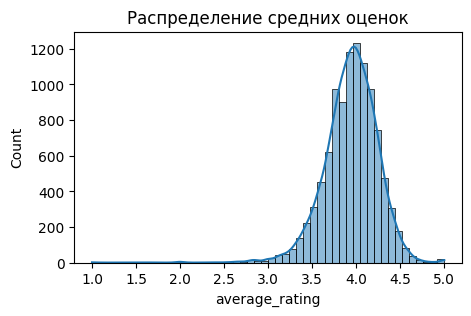

In [7]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=100)
sns.histplot(db['average_rating'], bins=50, kde=True) 
plt.title('Распределение средних оценок')

На этом графике ширина столбика показывает частичный интервал, а высота - количество значений в этом интервале. Возможно построить гистограмму, где высота столбика будет показывать плотность вероятности.

Гистограмма позволяет сделать предположение о виде распределения данных. Но зачем нам это? Вид распределения позволяет делать предсказания о вероятности того или иного события. Кроме того, для проведения статистических тестов, определения некоторых метрик требуется распределение определенного вида. Как правило, распределение должно быть нормальным. Если распределение нормальным не является, то данные можно привести к нормальному распределению или можно использовать специальные тесты, метрики. Поэтому важно ответить на вопрос: распределены ли данные нормально? Если нет, то нужно установить вид распределения.

Именно это позволяет статистике справляется со своей задачей. Напомним, что статистика должна дать понимание данных и предсказание будущих событий в ситуации, когда никакого понимания процесса, стоящего за этими данными, нет. Сделать же это можно через числовое описание данных, к которому затем будет предъявлено требование – должно соответствовать определенному распределению. И раз мы знаем распределение, то даже не зная закон, который к этому распределению привел, мы можем успокоится на том, что такого понимания данных достаточно, к тому же такое понимание возможность предсказывать будущие события. Грубо говоря, пускай монетка в среднем выпадает орлом чаще, чем решкой. Это вполне возможно, если из-за особенностей сплава, формы, есть перевес в сторону "орла". Мы не знаем точно закон, по которому выпадает орел, но в среднем - выпадает именно орел. Мы тогда можем предсказать что и дальше в среднем будет выпадать орел. Заметьте, никакого знания о процессе нам не потребовалось. 

Давайте еще раз посмотрим на наш график. Видно, что центр графика смещен к оценке 4, от единицы до 3 практически не ставят оценок. Объяснить это можно по-разному. Можно объяснить так, что книги "плохие" издают маленьким тиражом, они не доходят до читателя, а потому и оценку не получают. Но в рамках статистики и при тех данных, которые у нас есть, мы не можем сделать точный вывод о причинах такого распределения. Мы лишь фиксируем его.

Обсудим еще выбросы в данных. 

Выброс - это такое значение, которое пришло не из того распределения, из которого пришли основные данные. В этом смысл того, чтобы определить распределение для большинства данных, а затем уже выброс. Редкие данные возможны и в границах распределения для основных данных, но вот выброс выходит вообще за границы распределения, то есть например за пределы колокола в нормальном распределении. В этом смысл того, что сначала надо найти отличающиеся от других данные, а затем проверить их на влиятельность. 

Мы ищем выбросы, чтобы понять, есть ли они. Если есть, то нужно определить причину их появления. На этом основании нужно решить, что мы будем с ними делать, например можно удалить. 

Искать выбросы можно визуально, а можно с помощью применения специальных тестов. Визуально ищем с помощью "ящика с усами". Для примера посмотрим оценки. Использовать будем не классический ящик, а Boxenplot.

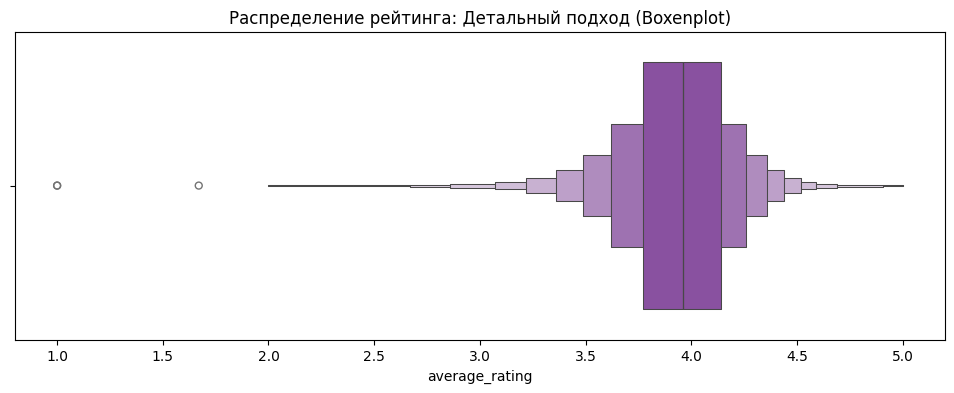

In [8]:
plt.figure(figsize=(12, 4), dpi=100)
sns.boxenplot(x=db['average_rating'], color='#8E44AD')
plt.title('Распределение рейтинга: Детальный подход (Boxenplot)')
plt.show()

Центральный прямоугольник на графике показывает 50% данных. Это означает, что 50% оценок находится в диапазоне от 3,7 до 4,2. Линия, которая делит этот прямоугольник – медиана. Каждые последующие прямоугольники берутся попарно. Данные за пределами "усов" – выбросы. 

Отфильтровать выбросы можно и без графиков. Сделать это можно с помощью критерия Тьюки. Однако часто не рекомендуют удалять данные, даже если они кажутся выбросами. Поэтому лучше попытаемся превратить нашу таблицу в историю. 

In [9]:
# пример удаления выбросов
Q1 = db['average_rating'].quantile(0.25)
Q3 = db['average_rating'].quantile(0.75)
IQR = Q3 - Q1

# Вычисляем границы "забора" Тьюки
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтруем выбросы
outliers = db[(db['average_rating'] < lower_bound) | (db['average_rating'] > upper_bound)]

print(f"Нижняя граница: {lower_bound:.2f}")
print(f"Верхняя граница: {upper_bound:.2f}")
print(f"Найдено выбросов: {len(outliers)}")

# Вывод примеров выбросов
print("\nПримеры аномальных книг:")
outliers[['title', 'average_rating', 'ratings_count']].head()

Нижняя граница: 3.22
Верхняя граница: 4.69
Найдено выбросов: 197

Примеры аномальных книг:


,title,average_rating,ratings_count
492,The Mermaid Chair,3.13,68363
578,The Jane Austen Book Club,3.08,57720
765,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,41428
918,The Complete Calvin and Hobbes,4.82,32213
1007,Harry Potter Collection (Harry Potter #1-6),4.73,28242


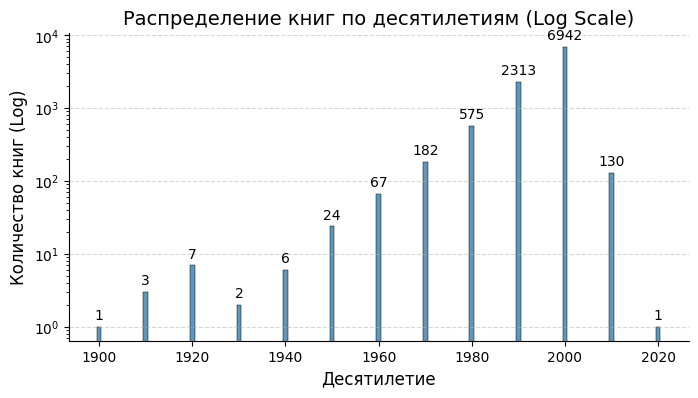

In [ ]:
# распределение книг по десятилетиям 
plot_df = db.copy()
plot_df['year_num'] = pd.to_numeric(plot_df['year'], errors='coerce')
plot_df['decade'] = (plot_df['year_num'] // 10) * 10
plot_df = plot_df.dropna(subset=['decade'])
plot_df['decade'] = plot_df['decade'].astype(int)
plt.figure(figsize=(8, 4))

ax = sns.histplot(data=plot_df, x='decade', discrete=True, color='#2874A6')
plt.yscale('log')
plt.title('Распределение книг по десятилетиям (Log Scale)', fontsize=14)
plt.xlabel('Десятилетие', fontsize=12)
plt.ylabel('Количество книг (Log)', fontsize=12)
ax.bar_label(ax.containers[0], fontsize=10, padding=3)
plt.grid(axis='y', which='major', linestyle='--', alpha=0.5)

sns.despine()
plt.show()

Мы видим, что основная масса книг приходится на 90-ые и 00-ые. Скорее всего, это связано с особенностями сборки данных. Кроме того, сайт заработал с 2007, поэтому на оценки с этого момента влиял маркетинг непосредственно. Старые же книги оценивались более объективно. 

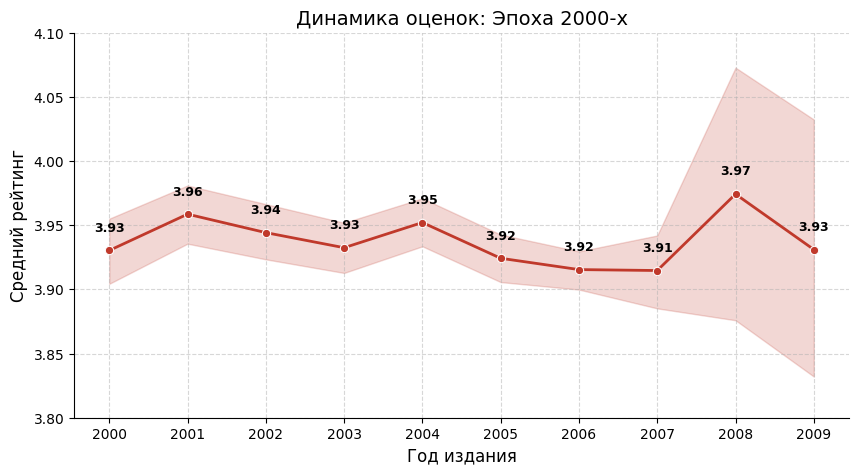

   year  mean  std
0  2000  3.93 0.28
1  2001  3.96 0.28
2  2002  3.94 0.30
3  2003  3.93 0.29
4  2004  3.95 0.31
5  2005  3.92 0.32
6  2006  3.92 0.30
7  2007  3.92 0.31
8  2008  3.97 0.33
9  2009  3.93 0.33


In [14]:
# график оценок по годам
db_analysis = db.copy()
db_analysis['year'] = pd.to_numeric(db_analysis['year'], errors='coerce')
db_analysis['average_rating'] = pd.to_numeric(db_analysis['average_rating'], errors='coerce')
decade_00 = db_analysis[(db_analysis['year'] >= 2000) & (db_analysis['year'] <= 2009)]
yearly_stats = decade_00.groupby('year')['average_rating'].agg(['mean', 'std']).reset_index()
plt.figure(figsize=(10, 5), dpi=100)
sns.lineplot(data=decade_00, x='year', y='average_rating', 
             marker='o', color='#C0392B', errorbar='ci', linewidth=2)
for x, y in zip(yearly_stats['year'], yearly_stats['mean']):
    plt.text(x, y + 0.015, f'{y:.2f}', ha='center', color='black', fontsize=9, fontweight='bold')
plt.title('Динамика оценок: Эпоха 2000-х', fontsize=14)
plt.xlabel('Год издания', fontsize=12)
plt.ylabel('Средний рейтинг', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(2000, 2010)) 
plt.ylim(3.8, 4.1) 

sns.despine()
plt.show()

print(yearly_stats.round(3))

Мы взяли 2000-ые, потому что для этого периода у нас достаточно много данных. Видим, что оценки достаточно стабильны. Даже рост до средней оценки в 3,97 в 2008 был чуть ослаблен стандартным отклонением в 0,33.

Найдено данных для 4 кварталов.
     quarter  mean  std  count
0  Q1_Winter  3.94 0.30   2423
1  Q2_Spring  3.93 0.30   2556
2  Q3_Summer  3.95 0.29   2708
3  Q4_Autumn  3.96 0.30   2566


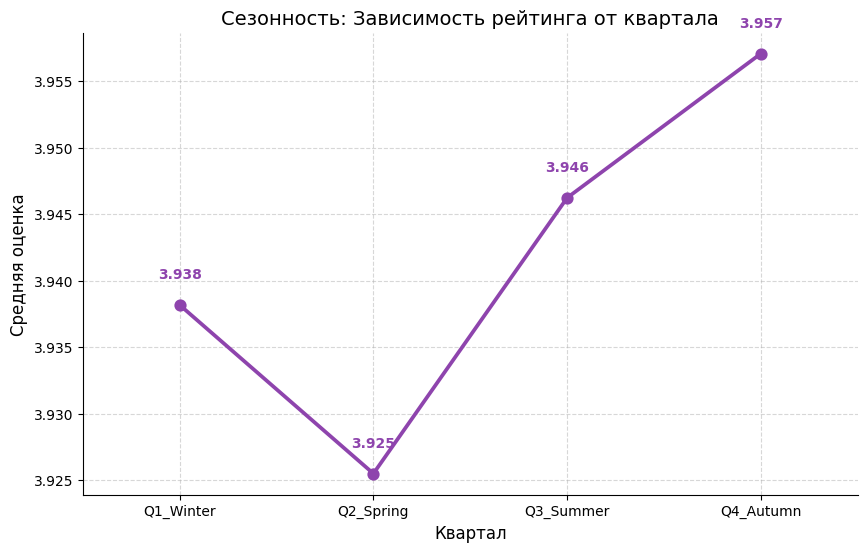

In [15]:
# график оценок по кварталам
db_clean = db.copy()
db_clean['average_rating'] = pd.to_numeric(db_clean['average_rating'], errors='coerce')
db_clean = db_clean.dropna(subset=['quarter', 'average_rating'])
quarter_stats = db_clean.groupby('quarter')['average_rating'].agg(['mean', 'std', 'count']).reset_index()
print(f"Найдено данных для {len(quarter_stats)} кварталов.")
print(quarter_stats)


plt.figure(figsize=(10, 6), dpi=100)
sns.pointplot(data=quarter_stats, x='quarter', y='mean', 
              color='#8E44AD', capsize=0.1, linestyles='-')

for i, row in quarter_stats.iterrows():
    plt.text(i, row['mean'] + 0.002, f"{row['mean']:.3f}", 
             ha='center', fontsize=10, fontweight='bold', color='#8E44AD')

plt.title('Сезонность: Зависимость рейтинга от квартала', fontsize=14)
plt.xlabel('Квартал', fontsize=12)
plt.ylabel('Средняя оценка', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

sns.despine()
plt.show()

На этом графике мы видим, что максимальную оценку получают книги, выходящие в 4 квартале. А вот книгам зимним и весенним везет уже не так.

После визуализации мы можем приступить к проверке статистических гипотез. 

Гипотезы выдвигаются либо о типе распределения, либо о параметрах известного распределения. 

Гипотезы делят на нулевую (основную) и конкурирующую (альтернативную). Если можно принять нулевую гипотезу, то необходимо отвергнуть альтернативную. Если же принять нулевую гипотезу нельзя, то необходимо принять альтернтативную. Пример: если нулевая гипотеза утверждает, что математическое ожидание равно 10, то альтернативная гипотеза будет утверждать, что математическое значение не равно 10.

Нулевая гипотеза может быть либо истинной, либо ложной. Независимо от этого, можно угадать истинность или угадать ложность гипотезы, или не угадать ни того, ни другого. С учетом этого, возможные ошибки делят на два вида:
1) ошибка первого рода возникает, если отвергнута истинная гипотеза. Например, если гипотеза, что математическое ожидание равно 10 является истинной, но пришлось ее отвергнуть, то возникает ошибка первого рода;
2) ошибка второго рода возникает, если принята неправильная гипотеза. Например, если гипотеза, что математическое ожидание равно 10 является ложной, но пришлось ее принять, то возникает ошибка второго рода. 

Есть вероятность совершить ошибку первого рода (отвергнуть истинную гипотезу). Такую вероятность называют уровнем значимости. Например, если уровень значимости 0,05, то это означает, что в 5 случаях из 100 можно допустить эту ошибку. 

Итак, есть нулевая гипотеза. Возникает вопрос, а как ее проверить? То есть как узнать, что это гипотеза истинная, или узнать, что гипотеза ложная?

Чтобы проверить нулевую гипотезу, нужно выполнить несколько шагов:

1) подобрать специальную случайную величину, распределение которой точно или примерно известно. Эта величина может быть обозначена как U или Z при нормальном распределении, F - при распределении по Фишеру-Снедекора и т.п. Эту величину называют статистическим критерием;
2) на основании имеющихся данных рассчитать те значения, которые входят в специальную случайную величину. Так получают частное (наблюдаемое) значение критерия.

Вот это на примере. Предположим, что мы хотим сравнить дисперсии двух категори книг - книги в 90ые, и книги в 00ые. Наша гипотеза будет состоять в том, что в 00ые, из-за интернета, разброс оценок увеличился. 

Итак, мы считаем дисперсию оценок книг 90ых и дисперсию книг 00ых. У каждой группы есть свое количество книг, такое количество называется степенями свободы. У книг 90ых степень свободы 2463, у книг нулевых степень свободы 7545. Это значит, что всего книг 90ых 2463, а книг 00ых – 7545.

Для книг 90ых дисперсия будет 0.0809, а для книг 00ых – 0.0899. Если бы дисперсии были равны, то деление дало бы 1. Если значение не равно 1, то надо определить случайно это или нет. Если неравенство 1 является случайным, тогда на самом деле деление должно бы давать 1, но из-за каких-то случайных факторов дало другое значение. В этом случае мы принимаем гипотезу, что значение равно 1, то есть дисперсии равны. Посмотрим, так ли это.

Делим большую дисперсию на меньшую. Получаем 1,11, это называется F-статистикой. Теперь мы задаемся вопросом: если есть две степени свободы - 2463 и 7454, то с вероятностью в 95% каким должно быть значение F–статистики? По специальным таблицам находим, что такое значение составляет 1,09. То есть эталонное значение сильно отличается от полученного. Значит невероятно получить соотношение в 1,11 на наших данных. Поэтому гипотеза отвергается.  

Мы использовали вероятность в 95%. Отсекать значения можно слева и справа. Посмотрите на рисунок. Тот уровень, который мы отсекам, называется p-value.

<img src="./images/probability.png" alt="набор данных" width="500" />

Важно также помнить, что проверка статистических гипотез не доказывает гипотезы. Одного доказательства еще не достаточно для принятия гипотезы. Однако достаточно одного противоречащего гипотезе факта, чтобы ее отвергнуть. Поэтому проверяют гипотезу на возможность принятия несколькими способами, а для отрицания гипотезы хватит и одного. 

Дополнительно надо учитывать, что тесты могут быть параметрическими и непараметрическими. Параметрические тесты основаны на известных свойствах распределений. Непараметрические не учитывают свойства распределений. В случае непараметрических тестов метрики распределения определяются с помощью многократного повторения теста.

Также все тесты можно разделить на: применимые только к количественным признакам, применимые только к категориальным признакам, применимые как к количественным, так и категориальным признакам. 

Еще одно деление: одни тесты говорят только о наличии связи (отсутствии связи) между признаками, другие тесты также показывают силу этой связи.

Теперь мы проведем тестирования нашего распределения оценок на нормальное распределение.

Базовая проверка на нормальное распределение может быть проведена с помощью критериев ассиметрии и эксцесса. У нормального распределения оба значения должны быть равны нулю. 

In [17]:
# проверка гипотезы о нормальном распределении данных
db['average_rating'] = pd.to_numeric(db['average_rating'], errors='coerce')
ratings = db.dropna(subset=['average_rating'])
ratings = ratings[ratings['average_rating'] > 0]['average_rating']
skew_val = skew(ratings, bias=False)
kurt_val = kurtosis(ratings, bias=False) # По Фишеру (нормальное = 0)
jb_stat, p_value = jarque_bera(ratings)


print(f"Размер выборки: {len(ratings)}")
print("-" * 30)
print(f"Асимметрия (Skewness): {skew_val:.4f}")
print(f"   > 0: хвост справа, < 0: хвост слева")
print(f"Эксцесс (Kurtosis):    {kurt_val:.4f}")
print(f"   > 0: острый пик, < 0: плоский")
print("-" * 30)
print(f"Статистика JB: {jb_stat:.2f}")
print(f"P-value:       {p_value:.6f}")

if p_value < 0.05:
    print("\nВЕРДИКТ: Распределение НЕ нормальное (H0 отвергнута).")
else:
    print("\nВЕРДИКТ: Распределение нормальное (H0 принята).")

Размер выборки: 10253
------------------------------
Асимметрия (Skewness): -0.7637
   > 0: хвост справа, < 0: хвост слева
Эксцесс (Kurtosis):    3.9983
   > 0: острый пик, < 0: плоский
------------------------------
Статистика JB: 7817.14
P-value:       0.000000

ВЕРДИКТ: Распределение НЕ нормальное (H0 отвергнута).


Таким же образом можно тестировать все другие известные распределения, чтобы определить, какое лучше подходит для наших данных. В результате лучшим оказывается бета-тестирование. 

Распределение   | SSE (Ошибка)   
-----------------------------------
norm            | 0.22325
beta            | 0.15416
gamma           | 0.35396
lognorm         | 0.22325
triang          | 5.91826
-----------------------------------
ЛУЧШИЙ РЕЗУЛЬТАТ: beta (SSE: 0.15416)


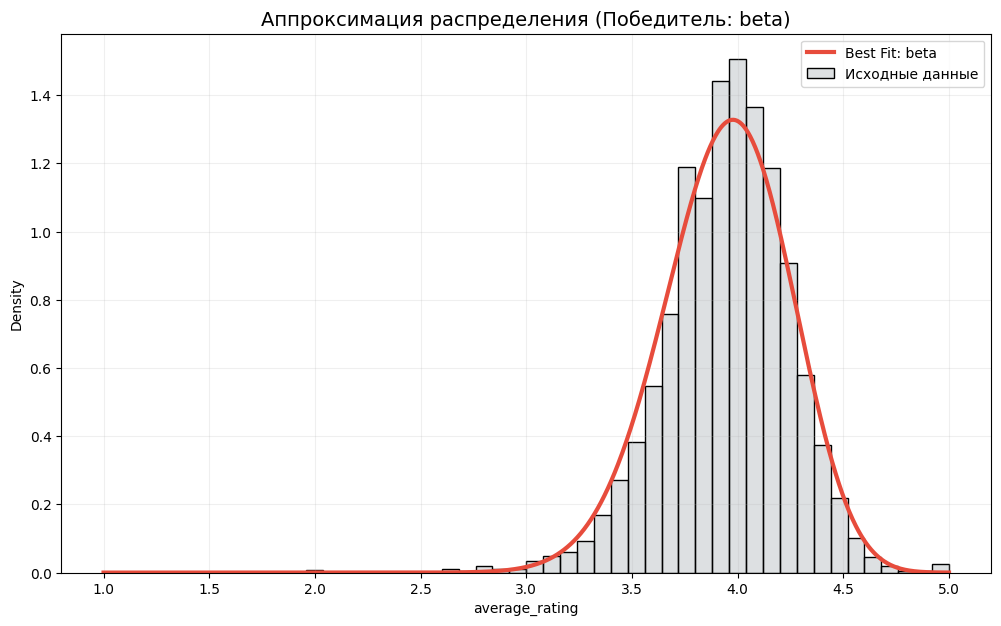

In [23]:
# Отключаем предупреждения для чистоты вывода
warnings.filterwarnings("ignore")

# 1. Подготовка данных
# Предполагаем, что db уже загружен
db.columns = db.columns.str.strip()
data = pd.to_numeric(db['average_rating'], errors='coerce').dropna()
data = data[data > 0] # Убираем нули для корректности логарифмических распределений

# 2. Функция для поиска лучшего распределения
def get_best_distribution(data):
    # Список кандидатов для проверки
    dist_names = ["norm", "beta", "gamma", "lognorm", "triang"]
    dist_results = []
    
    # Параметры гистограммы для вычисления ошибки
    y, x = np.histogram(data, bins=50, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0  # Центры бинов

    print(f"{'Распределение':<15} | {'SSE (Ошибка)':<15}")
    print("-" * 35)

    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        
        try:
            # Подгонка параметров (Fit)
            # Для Beta добавляем логику отступов, если требуется, но scipy обычно справляется сам
            if dist_name == 'beta':
                 # Пытаемся помочь оптимизатору для beta
                 params = dist.fit(data, floc=0, fscale=5.5) 
            else:
                params = dist.fit(data)

            # Создание теоретической PDF
            arg = params[:-2]
            loc = params[-2]
            scale = params[-1]
            pdf = dist.pdf(x, *arg, loc=loc, scale=scale)

            # Вычисление квадратичной ошибки (Sum of Squared Errors)
            sse = np.sum(np.power(y - pdf, 2.0))
            
            dist_results.append((dist_name, sse, params))
            print(f"{dist_name:<15} | {sse:.5f}")

        except Exception as e:
            print(f"{dist_name:<15} | Ошибка подгонки")

    # Сортировка по минимальной ошибке
    best_dist = sorted(dist_results, key=lambda x: x[1])[0]
    print("-" * 35)
    print(f"ЛУЧШИЙ РЕЗУЛЬТАТ: {best_dist[0]} (SSE: {best_dist[1]:.5f})")
    return best_dist

# 3. Запуск и Визуализация
best_dist_name, best_sse, best_params = get_best_distribution(data)

plt.figure(figsize=(12, 7))
# Гистограмма данных
sns.histplot(data, stat='density', color='#bdc3c7', bins=50, label='Исходные данные', alpha=0.5)

# Отрисовка лучшего распределения
dist = getattr(st, best_dist_name)
x_plot = np.linspace(data.min(), data.max(), 1000)
arg = best_params[:-2]
loc = best_params[-2]
scale = best_params[-1]
pdf = dist.pdf(x_plot, *arg, loc=loc, scale=scale)

plt.plot(x_plot, pdf, linewidth=3, color='#e74c3c', label=f'Best Fit: {best_dist_name}')
plt.title(f'Аппроксимация распределения (Победитель: {best_dist_name})', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

Отличие бета-распределения от обычных в том, что оно работает для данных, которые находятся в определенных границах. У нас это оценки от 1 до 5.

Теперь мы перейдем к поиску корреляций, найденное распределение нам в этом поможет. Если для нормального распределения применяется корреляция Пирсона, то на нашем распределении нужно использовать корреляцию Спирмена.

Корреляция с Рейтингом (Spearman):
                    average_rating
average_rating                1.00
num_pages                     0.12
ratings_count                 0.09
text_reviews_count            0.03
editions_count               -0.00


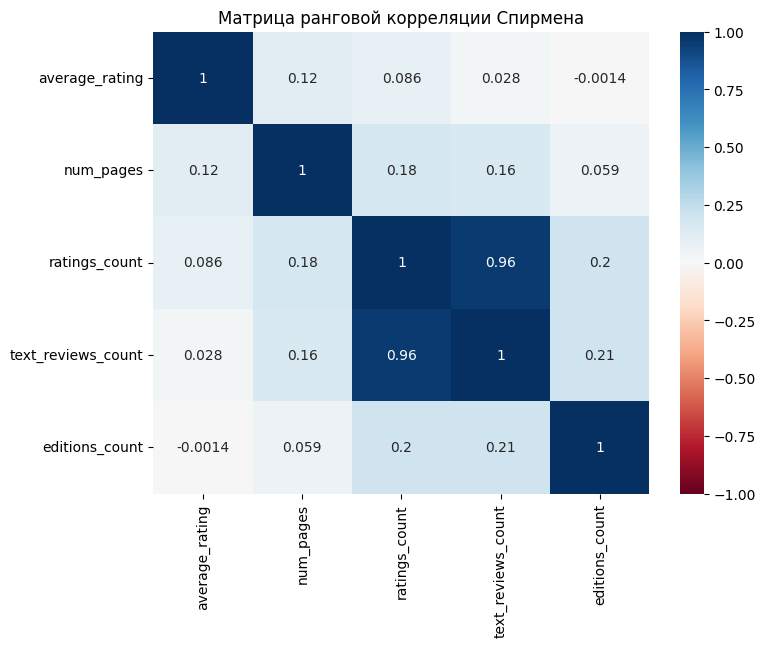

In [24]:
db.columns = db.columns.str.strip()
cols = ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count', 'editions_count' ]
for c in cols:
    db[c] = pd.to_numeric(db[c], errors='coerce')
db_clean = db.dropna(subset=cols)
db_clean = db_clean[db_clean['average_rating'] > 0]
spearman_corr = db_clean[cols].corr(method='spearman')


print("Корреляция с Рейтингом (Spearman):")
print(spearman_corr[['average_rating']].sort_values(by='average_rating', ascending=False))

plt.figure(figsize=(8, 6), dpi=100)
sns.heatmap(spearman_corr, annot=True, cmap='RdBu', center=0, vmin=-1, vmax=1)
plt.title('Матрица ранговой корреляции Спирмена', fontsize=12)
plt.show()

Мы видим, что средняя оценка связана с количеством страниц, но не сильно.

Теперь мы перейдем к дисперсионному анализу. 

У нас есть изучаемый нами признак – распределение оценок. Этот признак можно разбить на группы. Например, если взять признак выхода книг по кварталам, то можно все оценки разбить на группы. Одна группа – это оценки книг, которые выходили во 2 квартале, еще одна - оценки книг, которые выходили в 3 квартале и т.п. Среди всех оценок книг есть дисперсия, разброс, но и в группах есть разрброс. Например, разброс среди всех оценок будет 1, а разброс внутри оценок книг, вышедших во втором квартале, разброс будет 1,2. Означает ли это, что выход книг во втором квартале действительно влияет на оценку книги? Ответом на этот вопрос и занимается дисперсионный анализ.

Итак, вот какие предположения: 
1. есть количественный нормально распределенный признак X;
2. на этот признак воздействует фактор F;
3. фактор F имеет p постоянных уровней;
4. число наблюдений (испытаний) на каждом уровне одинаково и равно q.

Понять это можно по такой таблице.

| Номер испытания | Уровни фактора F₁ | Уровни фактора F₂ | ... | Уровни фактора Fₚ |
|-----------------|-------------------|-------------------|-----|--------------------|
| 1               | x₁₁               | x₁₂               | ... | x₁ₚ                |
| 2               | x₂₁               | x₂₂               | ... | x₂ₚ                |
| ⋮               | ⋮                 | ⋮                 | ... | ⋮                  |
| q               | x<sub>q1</sub>            | x<sub>q2</sub>            | ... | x<sub>qp</sub>            |
| **Групповая средняя** | **x̄<sub>группы</sub>** | **x̄<sub>группы 2</sub>**       | ... | **x̄<sub>группы p</sub>**         |


Теперь посмотрим формулы для расчета.

### Обозначения
* $x_{ij}$ — значение $j$-го наблюдения в $i$-й группе.
* $\bar{X}$ — общее среднее всех данных.
* $\bar{X}_i$ — среднее значение группы $i$.
* $n_i$ — количество наблюдений в группе $i$.
* $k$ — количество групп.
* $N$ — общее количество наблюдений ($N = \sum n_i$).

### Основные уравнения (Суммы квадратов)

**1. Общая вариация ($SS_{total}$)**
$$SS_{total} = \sum_{i=1}^{k} \sum_{j=1}^{n_i} (x_{ij} - \bar{X})^2$$

**2. Межгрупповая вариация ($SS_{between}$ / Фактор)**
$$SS_{between} = \sum_{i=1}^{k} n_i (\bar{X}_i - \bar{X})^2$$

**3. Внутригрупповая вариация ($SS_{within}$ / Ошибка)**
$$SS_{within} = \sum_{i=1}^{k} \sum_{j=1}^{n_i} (x_{ij} - \bar{X}_i)^2$$

*Проверка:* $SS_{total} = SS_{between} + SS_{within}$


### Итоговая таблица ANOVA

| Источник вариации | Сумма квадратов (SS) | Степени свободы (df) | Средний квадрат (MS) | F-статистика |
| :--- | :--- | :--- | :--- | :--- |
| **Между группами**<br>(Фактор) | $SS_{between}$ | $k - 1$ | $MS_{bet} = \frac{SS_{between}}{k - 1}$ | $F = \frac{MS_{bet}}{MS_{within}}$ |
| **Внутри групп**<br>(Ошибка/Остаток) | $SS_{within}$ | $N - k$ | $MS_{within} = \frac{SS_{within}}{N - k}$ | |
| **Итого** | $SS_{total}$ | $N - 1$ | | |

### Критерий принятия решения
Если расчетное значение $F > F_{crit}(\alpha, k-1, N-k)$, то нулевая гипотеза о равенстве средних отвергается (различия статистически значимы).

Так как у нас оценки подчинаются бета-распределению, а не нормальному, то применить обычный дисперсионный анализ здесь нельзя. Поэтому применим тест Велча, чтобы узнать как влияет выход книги в конкретный квартал на оценку. 

In [28]:
# дисперсионный анализ по кварталам
welch_quarter = pg.welch_anova(
    dv='average_rating',
    between='quarter',
    data=db
)

print("Welch ANOVA по кварталам:")
print(welch_quarter)

# Пост-хок Games-Howell по кварталам
gh_quarter = pg.pairwise_gameshowell(
    dv='average_rating',
    between='quarter',
    data=db
)

print("\nGames-Howell пост-хок по кварталам:")
gh_quarter

Welch ANOVA по кварталам:
    Source  ddof1   ddof2    F  p-unc  np2
0  quarter      3 5674.41 5.04   0.00 0.00

Games-Howell пост-хок по кварталам:


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Q1_Winter,Q2_Spring,3.94,3.93,0.01,0.01,1.48,4958.81,0.45,0.04
1,Q1_Winter,Q3_Summer,3.94,3.95,-0.01,0.01,-0.96,5034.97,0.77,-0.03
2,Q1_Winter,Q4_Autumn,3.94,3.96,-0.02,0.01,-2.21,4966.99,0.12,-0.06
3,Q2_Spring,Q3_Summer,3.93,3.95,-0.02,0.01,-2.53,5231.70,0.06,-0.07
4,Q2_Spring,Q4_Autumn,3.93,3.96,-0.03,0.01,-3.76,5119.96,0.00,-0.11
5,Q3_Summer,Q4_Autumn,3.95,3.96,-0.01,0.01,-1.32,5243.90,0.55,-0.04


Мы смотрим на столбец pval, находим значение меньше 0.05. Только с таким значением мы можем принять результат. Единственный вариант у нас - это "Q2_Spring – Q4_Autumn". Это означает, то отличие средних между весной и осенью действительно есть. Однако hedges говорит о том, что такое отличие крайне незначительно.

Теперь проанализируем названия книг. Здесь мы будем работать только с названиями на английском языке. 


Основные задачи обработки языка:

1. токенизация - разбиение текста на неделимые единицы, например слова;
2. устранение неоднозначности слов. Примеры "Кредитная карта заблокирована" и "Политическая карта Африки"; 
3. выделение именованных сущностей, то есть имен, названий организаций, местоположений;
4. морфологическая разметка, то есть определение частей речи, например существительное, глагол;
5. классификация предложений, описаний. Например, калссификация новостных статей по тематикам, классификация отзывов на фильмы на положительные и отрицательные;
6. генерация естественного языка, например для написания новостных статей;
7. создание вопросно-ответственных систем, например чат-ботов;
8. машинный перевод.

Традиционный подход к обработке языка предполагает:

1. предварительную обработку текста с целью уменьшить словарный запас и удалить помехи;
2. конструирование признаков, например мешок слов.

Начнем вот с чего. В **title** у нас часто задано не только название книги, но и какая-то характеристика в скобках. 

In [30]:
# Оптимизация: фильтрация и очистка в один проход
english_titles = (
    db[db['language_code'].isin(['en-GB', 'en-US', 'eng'])]
    .copy()  # Создаем независимую копию один раз
    .assign(
        title=lambda x: x['title']
            .str.replace(r'\s*\(.*?\)', '', regex=True) # Удаляем скобки вместе с пробелом перед ними
            .str.strip()
    )
)

pd.set_option('display.max_colwidth', None)
display(english_titles.head())

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,editions_count,year,quarter
0,Twilight,Stephenie Meyer,3.59,eng,501,4597666,94265,1,2006,Q3_Summer
1,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,eng,366,2530894,32871,1,2002,Q3_Summer
2,The Catcher in the Rye,J.D. Salinger,3.80,eng,277,2457092,43499,1,2001,Q1_Winter
3,Angels & Demons,Dan Brown,3.89,eng,736,2418736,21303,3,2006,Q2_Spring
4,Harry Potter and the Prisoner of Azkaban,J.K. Rowling,4.56,eng,435,2339585,36325,2,2004,Q2_Spring


In [39]:
# 1. Подготовка
nltk.download('stopwords', quiet=True)

# 2. Обработка текста
# Собираем единый корпус
text_corpus = ' '.join(english_titles['title'].astype(str)).lower()

# Токенизация (используем RegEx для чистоты, как в вашем примере)
tokens = re.findall(r'\w+', text_corpus)

# 3. Вычисление метрик
n_tokens = len(tokens)                  # N
n_types = len(set(tokens))              # V
ttr = (n_types / n_tokens) * 100 if n_tokens > 0 else 0

# --- НОВОЕ: Расчет средней длины слова ---
# Сумма длин всех слов деленная на количество слов
avg_word_len = sum(len(word) for word in tokens) / n_tokens if n_tokens > 0 else 0

# 4. Формирование отчета
stats_df = pd.DataFrame({
    'Метрика': [
        'Всего токенов (Tokens)', 
        'Уникальных слов (Types)', 
        'Лексическое разнообразие (TTR)',
        'Средняя длина слова (символов)' # Новая строка
    ],
    'Значение': [n_tokens, n_types, ttr, avg_word_len]
})

# 5. Вывод с форматированием (без запятых)
(stats_df.style
    .format({'Значение': lambda x: "{:.0f}".format(x) if x % 1 == 0 else "{:.2f}".format(x)})
    .hide(axis='index')
    .set_properties(**{'text-align': 'left', 'font-size': '11pt'})
    .set_caption("Расширенная статистика лексики")
)

Метрика,Значение
Всего токенов (Tokens),52340
Уникальных слов (Types),9720
Лексическое разнообразие (TTR),18.57
Средняя длина слова (символов),4.83


Видим, что уникальные слова составляют только 19% от всех слов в названиях. Много это или мало? Можно полагать, что названия книг достаточно разнообразны. Но интересно, насколько длинные слова используют в названиях книг.

Слова в основном короткие - пять знаков. Хорошо, теперь еще раз проведу деление на слова (токенизацию), но уже другим способом. Поищим самые популярные слова.

<Axes: title={'center': 'Топ-25 частотных слов'}, xlabel='Samples', ylabel='Counts'>

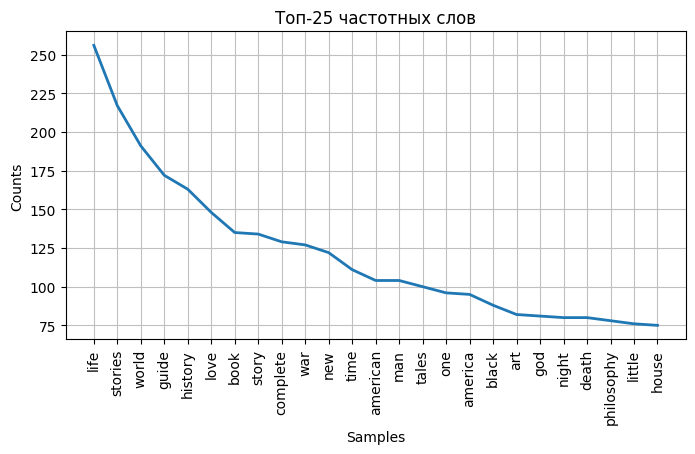

In [42]:
# Используем text_corpus, который мы создали шагом ранее
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(text_corpus) # <-- Было text, стало text_corpus

# Оптимизированный блок (из прошлого ответа)
# set() для скорости O(1)
sw_set = set(nltk.corpus.stopwords.words('english')) | {'vol', '1', '2', 'volume', 'la', 'de'}

words_ns = [
    w.lower() 
    for w in tokens 
    if w.lower() not in sw_set
]

# Визуализация
plt.figure(figsize=(8, 4))
freq = nltk.FreqDist(words_ns)
freq.plot(25, title='Топ-25 частотных слов')